# Study Validity

## Notebook Summary
- Loads preprocessed experiment and validated results data used for validity checks.
- Builds participant-block-condition mappings to inspect condition balancing.
- Computes Kendall correlations between block order and condition assignment.
- Visualizes distributions and counts with heatmaps, stacked plots, bar charts, and violin plots.


### Setup: Shared Utilities
Run the shared utility notebook to import libraries, helper functions, and path variables used in this analysis.


In [1]:
# Load shared imports, plotting configuration, and path variables from the common notebook.
%run functions.ipynb


### Load Analysis Data
Read experiment-level data, validated result-level data, and displayed-number exports required for the validity inspection workflow.


In [46]:
# Load the full interaction-level dataset used for procedure validity checks.
data_complete = pd.read_csv(rf'{export_data}data_experiment.csv', sep=";")
# Load validated trial results (cleaned result-level study outcomes).
results_complete = pd.read_csv(rf'{export_data}results_experiment_valid.csv', sep=";")

# Load displayed-number statistics for optional consistency checks.
numbers_display = pd.read_csv(rf'{export_data}numberDisplayed_all.csv', sep=';')


### Validate Condition Balance in Interaction Data
Create unique participant/block/condition assignments from interaction data and inspect their statistical and visual distributions.


,ProbandId,Block,Condition,ConditionId
0,2,0,No Feedback,0
1,2,1,Combined Feedback,3
2,2,2,Visual Feedback,2
3,2,3,Tactile Feedback,1
4,3,0,Tactile Feedback,1
...,...,...,...,...
83,22,3,Visual Feedback,2
84,23,0,Visual Feedback,2
85,23,1,Combined Feedback,3
86,23,2,Tactile Feedback,1


,Block,ConditionId
Block,1.000000,0.105028
ConditionId,0.105028,1.000000


ProbandId  ConditionId
Condition         Block                        
Combined Feedback 0              3            3
                  1              4            4
                  2              8            8
                  3              7            7
No Feedback       0              6            6
                  1              4            4
                  2              5            5
                  3              7            7
Tactile Feedback  0              8            8
                  1              8            8
                  2              2            2
                  3              4            4
Visual Feedback   0              5            5
                  1              6            6
                  2              7            7
                  3              4            4

<AxesSubplot:xlabel='Condition', ylabel='Block'>

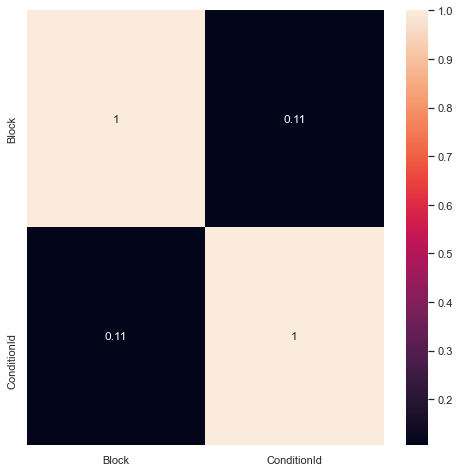

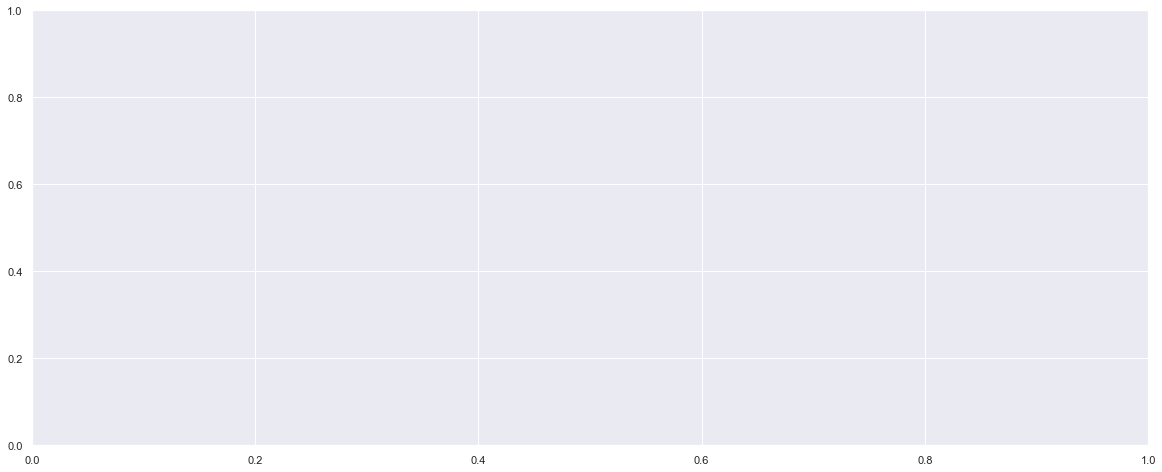

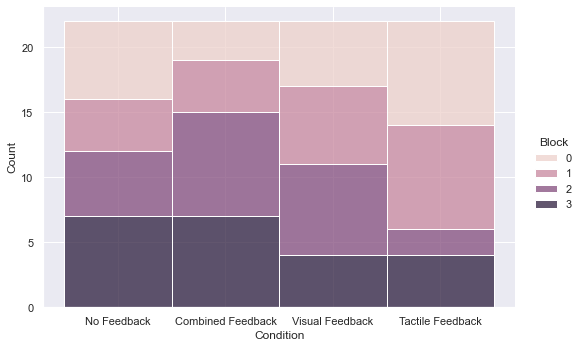

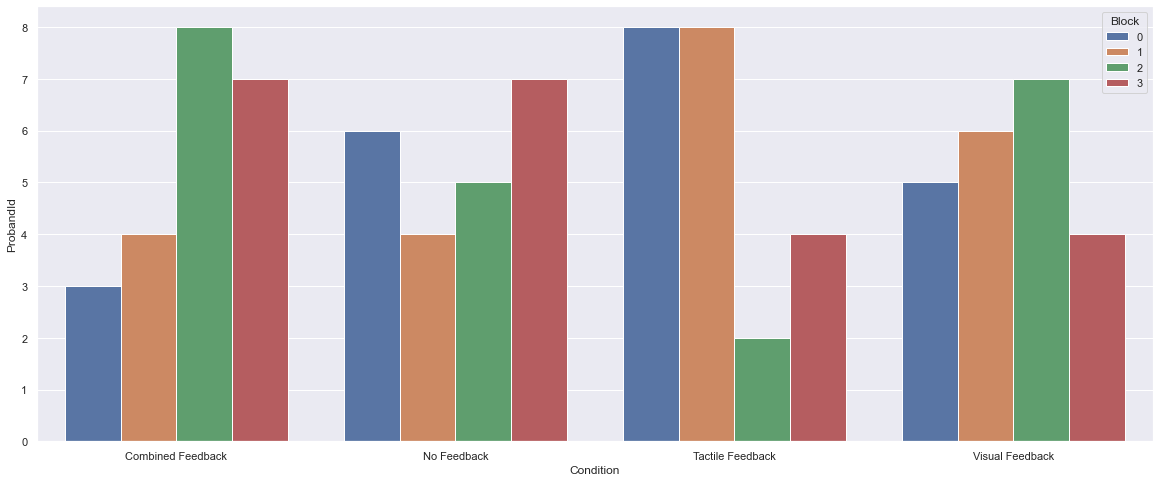

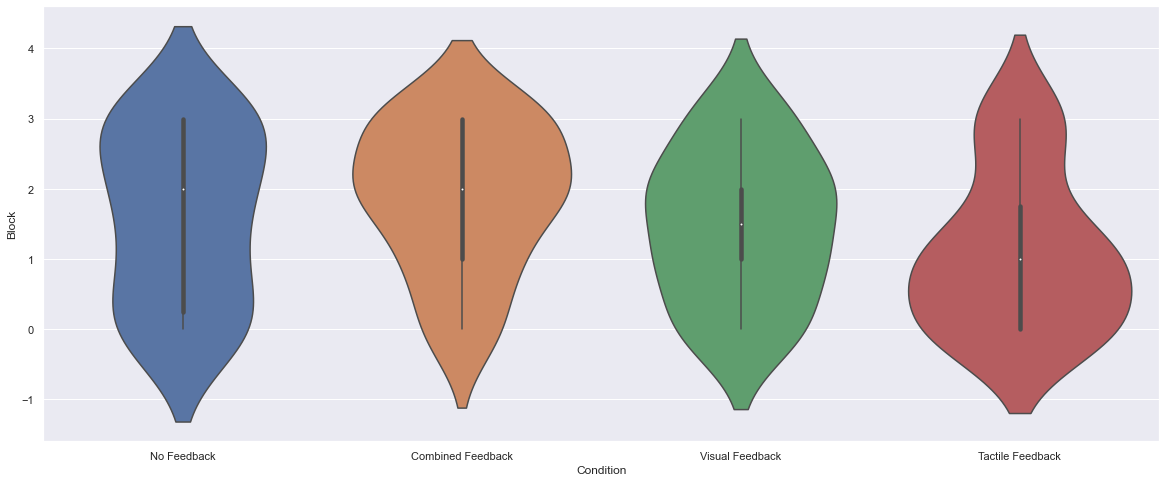

In [52]:
# Keep one row per participant, block, and condition to analyze assignment balance.
conditions = data_complete[['ProbandId','Block', 'Condition']].drop_duplicates().reset_index(drop=True)
# Convert condition labels to numeric ids for correlation analysis.
conditions['ConditionId'] = conditions['Condition'].map(condition_names.index)
display(conditions)

# Assess the monotonic association between block order and condition assignment.
correlations_kendall = conditions.iloc[:,1:].corr(method='kendall', min_periods=1)
display(correlations_kendall)

# Visualize pairwise correlations between block and encoded condition ids.
fig1, ax1 = plt.subplots(figsize=(8,8))
ax1 = sns.heatmap(correlations_kendall, annot=True)

# Show the condition-by-block distribution as stacked counts.
fig2, ax2 = plt.subplots(figsize=(20,8))
ax2 = sns.displot(conditions, x="Condition", hue="Block", multiple="stack", aspect=1.5)

# Aggregate trial counts per condition and block for a compact table view.
desc = conditions.groupby(['Condition', 'Block']).count()
display(desc)

# Plot participant counts per condition separated by block.
fig3, ax3 = plt.subplots(figsize=(20,8))
sns.barplot(data=desc.reset_index(), x='Condition', y='ProbandId', hue='Block')

# Inspect block spread per condition using a distribution plot.
fig2, ax2 = plt.subplots(figsize=(20,8))
sns.violinplot(data=conditions, x='Condition', y='Block')


### Validate Condition Balance in Result Data
Repeat the same balancing checks on validated result data using `BlockId` to confirm consistency across data sources.


,ProbandId,BlockId,Condition,ConditionId
0,2,0,No Feedback,0
1,2,1,Combined Feedback,3
2,2,2,Visual Feedback,2
3,2,3,Tactile Feedback,1
4,4,0,Combined Feedback,3
...,...,...,...,...
79,22,3,Visual Feedback,2
80,23,0,Visual Feedback,2
81,23,1,Combined Feedback,3
82,23,2,Tactile Feedback,1


,BlockId,ConditionId
BlockId,1.000000,0.093348
ConditionId,0.093348,1.000000


ProbandId  ConditionId
Condition         BlockId                        
Combined Feedback 0                3            3
                  1                4            4
                  2                8            8
                  3                6            6
No Feedback       0                6            6
                  1                4            4
                  2                4            4
                  3                7            7
Tactile Feedback  0                7            7
                  1                8            8
                  2                2            2
                  3                4            4
Visual Feedback   0                5            5
                  1                5            5
                  2                7            7
                  3                4            4

<AxesSubplot:xlabel='Condition', ylabel='BlockId'>

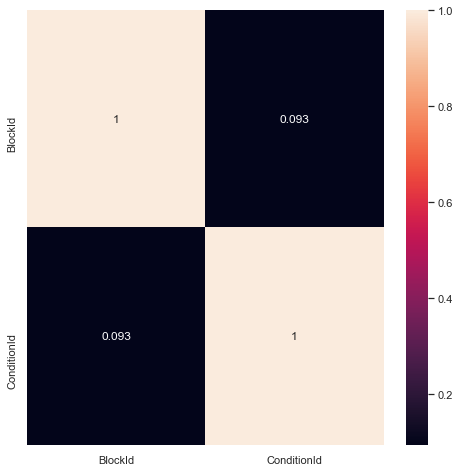

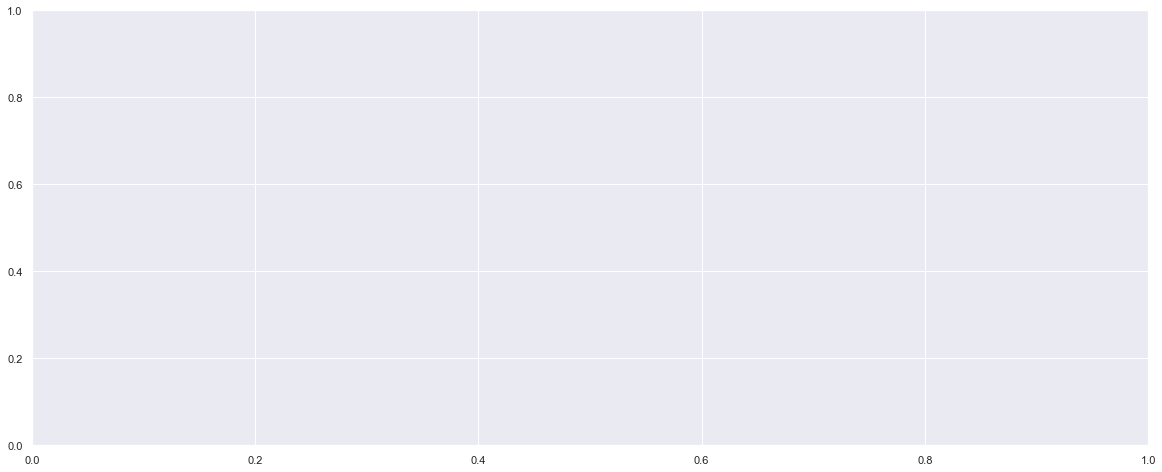

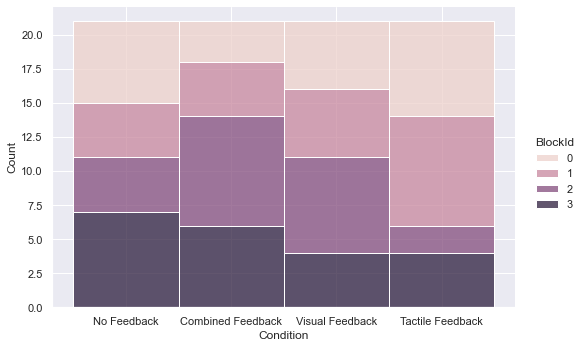

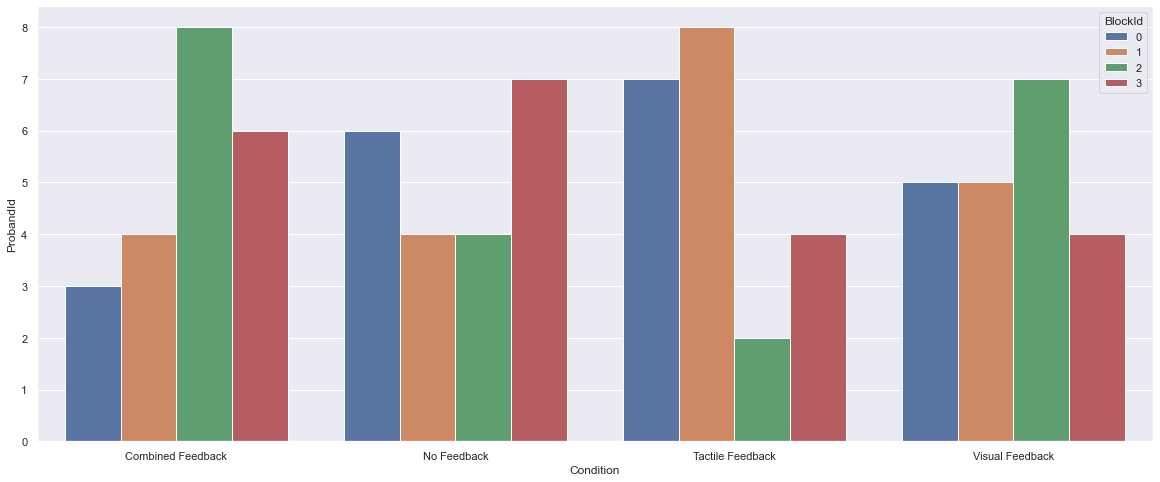

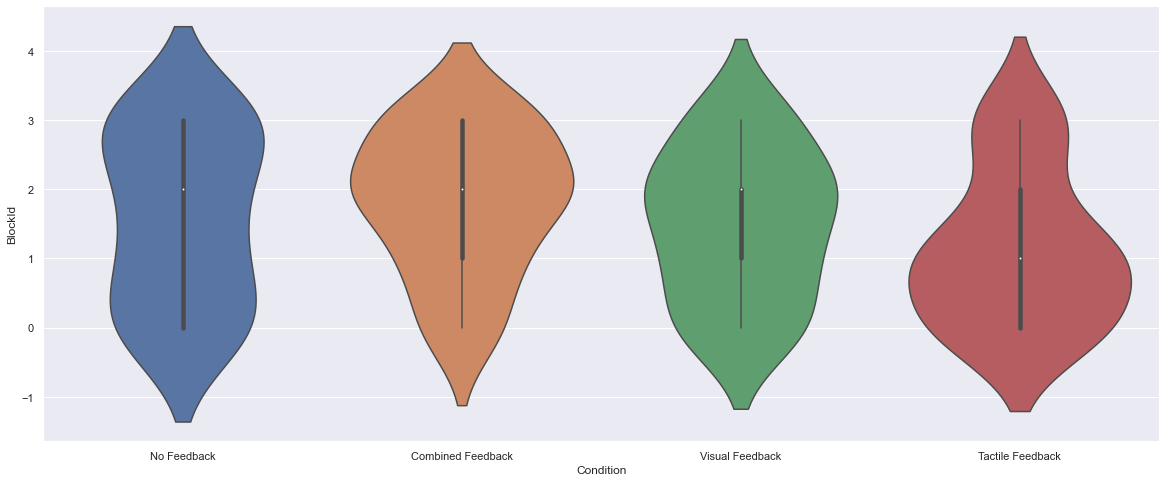

In [48]:
# Keep one row per participant, block id, and condition from validated results.
conditions = results_complete[['ProbandId','BlockId', 'Condition']].drop_duplicates().reset_index(drop=True)
# Convert condition labels to numeric ids for correlation analysis.
conditions['ConditionId'] = conditions['Condition'].map(condition_names.index)
display(conditions)

# Assess the monotonic association between block id and condition assignment.
correlations_kendall = conditions.iloc[:,1:].corr(method='kendall', min_periods=1)
display(correlations_kendall)

# Visualize pairwise correlations between block id and encoded condition ids.
fig1, ax1 = plt.subplots(figsize=(8,8))
ax1 = sns.heatmap(correlations_kendall, annot=True)

# Show the condition-by-block-id distribution as stacked counts.
fig2, ax2 = plt.subplots(figsize=(20,8))
ax2 = sns.displot(conditions, x="Condition", hue="BlockId", multiple="stack", aspect=1.5)

# Aggregate counts per condition and block id for tabular inspection.
desc = conditions.groupby(['Condition', 'BlockId']).count()
display(desc)

# Plot participant counts per condition separated by block id.
fig3, ax3 = plt.subplots(figsize=(20,8))
sns.barplot(data=desc.reset_index(), x='Condition', y='ProbandId', hue='BlockId')

# Inspect block-id spread per condition using a distribution plot.
fig2, ax2 = plt.subplots(figsize=(20,8))
sns.violinplot(data=conditions, x='Condition', y='BlockId')
